## 1. First Regression

$$
\text{reg} Y = \beta_0 + \beta_1 \text{Treatafter} + \beta_2 \text{Control} + \epsilon\
$$

$\text{est save} (\text{estimates for placebo figure true limit sample, limit treat})$


The code segment of this part performs a panel data regression analysis using the PanelOLS method from the linearmodels library. Here's a breakdown of what the code does:

- Importing Libraries: The code begins by importing the required libraries, including PanelOLS from linearmodels.
- Data Retrieval: It clones a repository from GitHub containing the data required for the analysis and navigates to the appropriate directory. Then, it lists the files to confirm the presence of the data file and unzips it.
- Data Loading: The code loads the dataset from the extracted Stata file into a Pandas DataFrame and sets the appropriate index for panel data analysis.
- Variable Definitions: Various parameters and variables used in the subsequent analysis are defined. These include the base year ($b$), dependent variable ($Y$), weight ($w$), maximum and minimum time periods ($tmax$ and $tmin$), and the effectiveness parameter $E$.
- Control Variable Construction: Control variables are constructed based on the defined parameters. These control variables are crucial for the regression analysis and are concatenated into a single formula string.
- Regression Analysis: The regression model is constructed using the PanelOLS method. The dependent variable, independent variables, and control variables are specified. Entity effects are included in the model by setting entity_effects=True.
- Regression Fitting: The regression model is fitted to the data, and the results are stored in the result variable.
- Output: The results of the regression analysis are printed, including the regression summary and coefficients.

In summary, this code segment retrieves panel data, constructs control variables, performs a panel data regression analysis, and prints the results of the regression.

In [1]:
!pip install linearmodels pandas

import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS
import statsmodels.formula.api as smf

# Clone the repository and navigate to the appropriate directory
!git clone https://github.com/mjahangiralam/Data-Science-for-Economic-and-Social-Issues.git
%cd Data-Science-for-Economic-and-Social-Issues/DiD/Cengiz-et-al

# List files to confirm the data file exists
!ls

# Unzip the data file
!unzip Figure2_for_QJE.dta.zip

# Load the data
df = pd.read_stata('Figure2_for_QJE.dta')

# Set index for panel data analysis
df = df.set_index(['wagebinstate', 'quarterdate'])

# Define basic parameters
b = 1979
Y = 'overallcountpcall'
w = 1  # Select weight, if w=0, then no weight
tmax = 16
E = 0.5796588659286499  # Assume E value
denominator = 1 / (1 + (tmax / 4))

# Create weight column
if w:
    weight_column = f'wt{Y}{b}'
else:
    weight_column = None

# Define global variables
wmax = 4
wmin = 4
tmax = 16
tmin = 12

# Define initial variables as empty strings
treatafter = ""
treatbefore = ""

# Loop over values between tmax and 0 with step size 4
for k in range(0, tmax+1, 4):
    K = ""
    if k < 0:
        nk = -k
        K = "F{}".format(nk)
    elif k > 0:
        K = "L{}".format(k)

    # Append to treatafter
    for j in range(wmin, 2*wmax+1):
        treatafter += "{}treat_m{} ".format(K, j)
    for j in range(0, wmax+1):
        treatafter += "{}treat_p{} ".format(K, j)

# Loop over values between -tmin and -8 with step size 4
for k in range(-tmin, -7, 4):
    K = ""
    if k < 0:
        nk = -k
        K = "F{}".format(nk)
    elif k > 0:
        K = "L{}".format(k)

    # Append to treatbefore
    for j in range(wmin, 2*wmax+1):
        treatbefore += "{}treat_m{} ".format(K, j)
    for j in range(0, wmax+1):
        treatbefore += "{}treat_p{} ".format(K, j)

# Define global variables
wmax = 4
wmin = 4
tmax = 16
tmin = 12
truewmin = 4
truewmax = 4

# Initialize empty strings
placeboafter1 = ""
placebobefore1 = ""
placebocontafter1 = ""
windowpl1 = ""

# Calculate wmin
wmin = truewmax + 1

# Print the difference between wmin and wmax
print("Placebo wmin and wmax should not be too far apart.")
print(wmax - wmin)

# Assert that the difference between wmax and wmin is less than 9
assert (wmax - wmin) < 9

# Loop to calculate placeboafter1 and placebocontafter1
for k in range(0, tmax+1, 4):
    K = ""
    if k < 0:
        nk = -k
        K = "F{}".format(nk)
    elif k > 0:
        K = "L{}".format(k)

    for j in range(wmin, wmax+1):
        placeboafter1 += "{}treat_p{} ".format(K, j)
        placebocontafter1 += "i.one#c.{}treat_p{} ".format(K, j)

# Loop to calculate placebobefore1
for k in range(-tmin, -7, 4):
    if k != -4:
        K = ""
        if k < 0:
            nk = -k
            K = "F{}".format(nk)
        elif k > 0:
            K = "L{}".format(k)

        for j in range(wmin, wmax+1):
            placebobefore1 += "i.one#c.{}treat_p{} ".format(K, j)

# Loop to calculate windowpl1
for j in range(wmin, wmax+1):
    windowpl1 += "i.one#c.windowpl1_p{} ".format(j)

# Define global variables
wmax = 4
wmin = 4
tmax = 16
tmin = 12
truewmin = 4
truewmax = 4
placebo1wmax = 13
placebo2wmax = 16
prevwmax = placebo1wmax

# Initialize empty strings
placeboafter2 = ""
placebobefore2 = ""
placebocontafter2 = ""
windowpl2 = ""

# Calculate wmin
wmin = prevwmax + 1

# Print the difference between wmin and wmax
print("Placebo wmin and wmax should not be too far apart.")
print(wmax - wmin)

# Assert that the difference between wmax and wmin is less than 9
assert (wmax - wmin) < 9

# Loop to calculate placeboafter2 and placebocontafter2
winf = wmax + 1
for k in range(0, tmax+1, 4):
    K = ""
    if k < 0:
        nk = -k
        K = "F{}".format(nk)
    elif k > 0:
        K = "L{}".format(k)

    for j in range(wmin, winf+1):
        placeboafter2 += "{}treat_p{} ".format(K, j)
        placebocontafter2 += "i.one#c.{}treat_p{} ".format(K, j)

# Loop to calculate placebobefore2
for k in range(-tmin, -7, 4):
    if k != -4:
        K = ""
        if k < 0:
            nk = -k
            K = "F{}".format(nk)
        elif k > 0:
            K = "L{}".format(k)

        for j in range(wmin, winf+1):
            placebobefore2 += "i.one#c.{}treat_p{} ".format(K, j)

# Initialize variable window
window = " "

# Assume wmin and wmax are defined somewhere
wmin = 4
wmax = 4
# First loop: from wmin to 1, step 1
for j in range(wmin, 2): # Use 2 as the end value because range is exclusive
   window += f" i.one#c.window_m{j}"

# Second loop: from 0 to wmax, step 1
for j in range(0, wmax + 1): # Include wmax, so +1
   window += f" i.one#c.window_p{j}"


def treatmentcontrolwindows(Tmax=16, Tmin=12, Wmax=4, Wmin=4,
                            CONTROLMethod=None, CONTLead=None,
                            CONTROLFmethod=None, Disagg=None):
    # Define defaults
    Disagg = Disagg if Disagg is not None else "N"
    CONTROLMethod = CONTROLMethod if CONTROLMethod is not None else "Absorb"
    CONTLead = CONTLead if CONTLead is not None else "Y"

    # Set control and controlf based on conditions
    control = ""
    controlf = ""

    if Disagg == "":
        Disagg = "N"
    if CONTROLMethod == "":
        CONTROLMethod = "Absorb"
    if CONTLead == "":
        CONTLead = "Y"

    if CONTLead == "Nolead":
        if Disagg != "Y":
            if CONTROLMethod == "Linear":
                control += "i.one#c.postcont_m i.one#c.postcont_p "
            else:
                control += "postcont_m postcont_p "
        else:
            if CONTROLMethod == "Linear":
                for k in range(-Tmin, Tmax + 1, 4):
                    K = f"F{k}" if k < 0 else "" if k == 0 else f"L{k}"
                    for j in range(Wmin, 2):
                        control += f"i.one#c.{K}cont_m{j} "
                    for j in range(0, Wmax + 1):
                        control += f"i.one#c.{K}cont_p{j} "
            else:
                for k in range(-Tmin, Tmax + 1, 4):
                    K = f"F{k}" if k < 0 else "" if k == 0 else f"L{k}"
                    for j in range(Wmin, 2):
                        control += f"{K}cont_m{j} "
                    for j in range(0, Wmax + 1):
                        control += f"{K}cont_p{j} "
    else:
        if Disagg != "Y":
            if CONTROLMethod == "Linear":
                control += "i.one#c.postcont_m i.one#c.precont_m i.one#c.earlycont_m "
                control += "i.one#c.postcont_p i.one#c.precont_p i.one#c.earlycont_p "
            else:
                control += "postcont_m precont_m earlycont_m "
                control += "postcont_p precont_p earlycont_p "
        else:
            if CONTROLMethod == "Linear":
                for k in range(-Tmin, Tmax + 1, 4):
                    K = f"F{k}" if k < 0 else "" if k == 0 else f"L{k}"
                    for j in range(Wmin, 2):
                        control += f"i.one#c.{K}cont_m{j} "
                    for j in range(0, Wmax + 1):
                        control += f"i.one#c.{K}cont_p{j} "
            else:
                for k in range(-Tmin, Tmax + 1, 4):
                    K = f"F{k}" if k < 0 else "" if k == 0 else f"L{k}"
                    for j in range(Wmin, 2):
                        control += f"{K}cont_m{j} "
                    for j in range(0, Wmax + 1):
                        control += f"{K}cont_p{j} "

    if CONTROLMethod == "None":
        control = ""

    # Set controlf based on conditions
    if CONTLead == "Nolead":
        controlf += "postcontf_m postcontf_p "
    else:
        controlf += "postcontf_m precontf_m earlycontf_m "
        controlf += "postcontf_p precontf_p earlycontf_p "

    if CONTROLFmethod == "None":
        controlf = ""

    return control, controlf, Disagg, CONTROLMethod, CONTLead


# Get values for five variables
control, controlf, Disagg, CONTROLMethod, CONTLead = treatmentcontrolwindows(CONTLead="Nolead", CONTROLMethod="Linear", Disagg="Y")


# Controlafter & Controlbefore
# Define global variables

# First, let's initialize the variables and globals
wmax = 4
wmin = 4
tmax = 16
tmin = 12

# Initial global strings, controlbefore and controlafter
controlbefore = " "
controlafter = " "

# Loop to generate the controlafter string
for k in range(0, tmax + 1, 4):
    if k < 0:
        K = f"F{-k}"
    elif k == 0:
        K = ""
    else:
        K = f"L{k}"

    # Append to controlafter for each j
    for j in range(wmin, wmin + 1):
        controlafter += f" i.one#c.{K}treat_m{j}"
    for j in range(0, wmax + 1):
        controlafter += f" i.one#c.{K}treat_p{j}"

# Loop to generate the controlbefore string
for k in range(-tmin, -8 + 1, 4):
    if k != -4:
        if k < 0:
            K = f"F{-k}"
        elif k == 0:
            K = ""
        else:
            K = f"L{k}"

        # Append to controlbefore for each j
        for j in range(wmin, wmin + 1):
            controlbefore += f" i.one#c.{K}treat_m{j}"
        for j in range(0, wmax + 1):
            controlbefore += f" i.one#c.{K}treat_p{j}"

# Filter the data
df_filtered = df[(df['year'] >= 1979) & (df['cleansample'] == 1)]

# Names of dependent and independent variables
Y = 'overallcountpc'
treatafter = 'treatafter'
control_vars = ['controlbefore', 'window', 'placebocontafter1', 'placebobefore1',
                'windowpl1', 'placebocontafter2', 'placebobefore2',
                'windowpl2', 'controlf', 'control']

# Construct formula including entity and time fixed effects
formula = f'{Y} ~ {treatafter} + one + ' + ' + '.join(control_vars)

# Regression
model = PanelOLS.from_formula(formula, df_filtered)

# Fit regression
result = model.fit(cov_type='clustered', clusters=df_filtered['statenum'])

# Print results
print(result)

# Ensure necessary libraries are imported
from linearmodels import PanelOLS

# Define dependent and independent variables for the model
# Assuming 'overallcountpcall' is the dependent variable, already defined in the dataframe
dependent_var = df[Y]
# Combine all your independent variables and control variables into one formula string
independent_vars = f'{treatafter} + {treatbefore} + {placeboafter1} + {placebobefore1} + {placebocontafter1} + {windowpl1} + {placebocontafter2} + {placebobefore2} + {windowpl2}'

# Convert the string of independent variables into columns in the dataframe
# This might need adjustments depending on actual column names or methods
# For example, if these variable names are not column names, you might need to evaluate them as expressions before using in regression
# If these variable names are direct column names, you can directly use them
X = df[independent_vars.split(' + ')]

# Add constant term
X['const'] = 1

# Run panel data regression
model = PanelOLS(dependent_var, X, entity_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

# Print regression summary
print(results.summary)

# Print regression coefficients
print("Regression coefficients:")
print(results.params)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
Cloning into 'Data-Science-for-Economic-and-Social-Issues'...
remote: Enumerating objects: 408, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 408 (delta 19), reused 72 (delta 16), pack-reused 332
Receiving objects: 100% (408/408), 273.20 MiB | 16.03 MiB/s, done.
Resolving deltas: 100% (186/186), done.
Updating files: 100% (341/341), done.
/content/Data-Science-for-Economic-and-Social-Issues/DiD/Cengiz-et-al
Figure2_for_QJE.dta.zip  Table1_for_QJE.dta.zip
Archive:  Figure2_for_QJE.dta.zip
  inflating: Figure2_for_QJE.dta     
Placebo wmin and wmax should not be too far apart.
-1
Placebo wmin and wmax should not be too far apart.
-10
                          PanelOLS Estimation Summary

KeyError: "None of [Index(['treatafter',\n       'F12treat_m4 F12treat_m5 F12treat_m6 F12treat_m7 F12treat_m8 F12treat_p0 F12treat_p1 F12treat_p2 F12treat_p3 F12treat_p4 F8treat_m4 F8treat_m5 F8treat_m6 F8treat_m7 F8treat_m8 F8treat_p0 F8treat_p1 F8treat_p2 F8treat_p3 F8treat_p4 ',\n       '', '', '', '', '', '', ''],\n      dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd
from linearmodels import PanelOLS

# Load data
df = pd.read_stata('Figure2_for_QJE.dta')
df.set_index(['wagebinstate', 'quarterdate'], inplace=True)

# Define global variables and parameters
wmax = 4
wmin = 4
tmax = 16
tmin = 12
truewmin = 4
truewmax = 4

# Construct variables
# Here I'll use the logic you've built for constructing variables, ensuring correct decomposition and construction of variable names
# Make sure your variable name strings are correctly decomposed
treatment_effects = ""
for k in range(0, tmax + 1, 4):
    K = f"L{k}" if k > 0 else ""
    treatment_effects += " + ".join([f"{K}treat_p{j}" for j in range(0, wmax + 1)]) + " + "

# Simplifying the example, here we need to be precise with the correct variables
# Assuming we correctly decomposed variable names from the string, below is an example
independent_vars_list = treatment_effects.strip(' + ').split(' + ')
independent_vars_list = [var for var in independent_vars_list if var in df.columns]  # Ensure variables are in df

# Add constant term
df['const'] = 1

# Select columns for regression
X = df[independent_vars_list + ['const']]

# Dependent variable
Y = df['overallcountpcall']  # Make sure this column name exists in DataFrame

# Perform regression
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

# Print regression results
print(results.summary)

# Extract regression coefficients
coefficients = results.params
print("Regression coefficients:")
print(coefficients)


<ipython-input-2-180748bb307b>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['const'] = 1
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:      overallcountpcall   R-squared:                        0.0002
Estimator:                   PanelOLS   R-squared (Between):              0.0003
No. Observations:              889083   R-squared (Within):               0.0002
Date:                Mon, May 06 2024   R-squared (Overall):              0.0003
Time:                        04:21:58   Log-likelihood                 1.434e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      8.6988
Entities:                        5967   P-value                           0.0000
Avg Obs:                       149.00   Distribution:               F(25,883091)
Min Obs:                       149.00                                           
Max Obs:                       149.00   F-statistic (robust):             25.842
                            

## 2. Second Regression


$$
\text{reg } Y = \beta_0 + \beta_1 \text{PlaceboAfter} + \beta_2 \text{Control} + \epsilon
$$


This code segment conducts a panel data regression analysis using the PanelOLS method from the linearmodels library:

- Loading Data: It loads the dataset from a Stata file named 'Figure2_for_QJE.dta' and sets the index to $['wagebinstate', 'quarterdate']$.
- Defining Basic Parameters: It defines basic parameters such as $wmax$, $wmin$, and $tmax$, which represent maximum positive lag, maximum negative lag, and maximum time period, respectively.
- Constructing Treatment Effects Variable: It constructs a variable named treatment_effects by iterating over the range of time periods ($tmax$) and creating treatment effects variables for positive and negative lags ($treat_p$ and $treat_m$).
- Defining Control Variables: It defines a list of control variables named control_vars.
- Combining Variables for Regression: It combines treatment effects variables, control variables, and a constant term into a list named all_vars.
- Ensuring Variable Existence and Adding Constant Term: It ensures that all variables exist in the dataset ($df$) and adds a constant term ($const$) to the list of variables.
- Defining the Dependent Variable: It defines the dependent variable $Y$ as $overallcountpc$.
- Performing Panel Regression: It performs a panel regression using the PanelOLS model with entity effects and clustered standard errors.
- Printing Regression Results: It prints the summary of regression results including coefficients, standard errors, t-statistics, p-values, and other relevant statistics.
- Extracting and Printing Regression Coefficients: It extracts the regression coefficients from the results and prints them.

In [ ]:
import pandas as pd
from linearmodels import PanelOLS

# Load data
df = pd.read_stata('Figure2_for_QJE.dta')
df.set_index(['wagebinstate', 'quarterdate'], inplace=True)

# Define global variables and parameters
wmax = 4
wmin = 4
tmax = 16
tmin = 12
truewmin = 4
truewmax = 4

# Construct variables
# Here I'll use the logic you've built for constructing variables, ensuring correct decomposition and construction of variable names
# Make sure your variable name strings are correctly decomposed
treatment_effects = ""
for k in range(0, tmax + 1, 4):
    K = f"L{k}" if k > 0 else ""
    treatment_effects += " + ".join([f"{K}treat_p{j}" for j in range(0, wmax + 1)]) + " + "

# Simplifying the example, here we need to be precise with the correct variables
# Assuming we correctly decomposed variable names from the string, below is an example
independent_vars_list = treatment_effects.strip(' + ').split(' + ')
independent_vars_list = [var for var in independent_vars_list if var in df.columns]  # Ensure variables are in df

# Add constant term
df['const'] = 1

# Select columns for regression
X = df[independent_vars_list + ['const']]

# Dependent variable
Y = df['overallcountpcall']  # Make sure this column name exists in DataFrame

# Perform regression
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

# Print regression results
print(results.summary)

# Extract regression coefficients
coefficients = results.params
print("Regression coefficients:")
print(coefficients)


In [ ]:
import pandas as pd
from linearmodels.panel import PanelOLS

# Load data
df = pd.read_stata('Figure2_for_QJE.dta')
df.set_index(['wagebinstate', 'quarterdate'], inplace=True)

# Define basic parameters
wmax = 4
wmin = 4
tmax = 16
tmin = 12

# Construct treatment effects variable
treatment_effects = ""
for k in range(0, tmax + 1, 4):
    K = f"L{k}" if k > 0 else ""
    treatment_effects += " + ".join([f"{K}treat_p{j}" for j in range(0, wmax + 1)]) + " + "

# Strip the trailing " + " and split to list
independent_vars_list = treatment_effects.strip(' + ').split(' + ')

# Define control variables
control_vars = ['controlbefore', 'window', 'placebocontafter1', 'placebobefore1',
                'windowpl1', 'placebocontafter2', 'placebobefore2', 'windowpl2', 'controlf', 'control']

# Combine all variables for regression
all_vars = independent_vars_list + control_vars + ['const']

# Ensure all variables exist in df, add constant term
df['const'] = 1
all_vars = [var for var in all_vars if var in df.columns]  # Filter out any non-existing columns

# Dependent variable
Y = 'overallcountpc'  # Ensure this column name exists in DataFrame

# Perform panel regression
model = PanelOLS(df[Y], df[all_vars], entity_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

# Print regression results
print(results.summary)

# Extract and print regression coefficients
coefficients = results.params
print("Regression Coefficients:")
print(coefficients)


<ipython-input-3-e95f66b90b4f>:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['const'] = 1
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:         overallcountpc   R-squared:                        0.0005
Estimator:                   PanelOLS   R-squared (Between):              0.0007
No. Observations:              889083   R-squared (Within):               0.0005
Date:                Mon, May 06 2024   R-squared (Overall):              0.0007
Time:                        04:41:53   Log-likelihood                 3.338e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      16.388
Entities:                        5967   P-value                           0.0000
Avg Obs:                       149.00   Distribution:               F(25,883091)
Min Obs:                       149.00                                           
Max Obs:                       149.00   F-statistic (robust):             2.6298
                            

In [ ]:
import pandas as pd
from linearmodels.panel import PanelOLS

# Load data
df = pd.read_stata('Figure2_for_QJE.dta')
df.set_index(['wagebinstate', 'quarterdate'], inplace=True)

# Define basic parameters
wmax = 4  # Maximum positive lag
wmin = 4  # Maximum negative lag
tmax = 16  # Maximum time period

# Construct treatment effects variable
treatment_effects = ""
for k in range(0, tmax + 1, 4):
    K = f"L{k}" if k > 0 else ""
    # Adding positive treatment effects
    treatment_effects += " + ".join([f"{K}treat_p{j}" for j in range(0, wmax + 4)]) + " + "
    # Adding negative treatment effects
    treatment_effects += " + ".join([f"{K}treat_m{j}" for j in range(0, wmin + 4)]) + " + "

# Strip the trailing " + " and split to list
independent_vars_list = treatment_effects.strip(' + ').split(' + ')

# Define control variables
control_vars = ['controlbefore', 'window', 'placebocontafter1', 'placebobefore1',
                'windowpl1', 'placebocontafter2', 'placebobefore2', 'windowpl2', 'controlf', 'control']

# Combine all variables for regression
all_vars = independent_vars_list + control_vars + ['const']

# Ensure all variables exist in df, add constant term
df['const'] = 1
all_vars = [var for var in all_vars if var in df.columns]  # Filter out any non-existing columns

# Dependent variable
Y = 'overallcountpc'  # Ensure this column name exists in DataFrame

# Perform panel regression
model = PanelOLS(df[Y], df[all_vars], entity_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

# Print regression results
print(results.summary)

# Extract and print regression coefficients
coefficients = results.params
print("Regression Coefficients:")
print(coefficients)


<ipython-input-28-0e8598bbf48b>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['const'] = 1
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:         overallcountpc   R-squared:                        0.0016
Estimator:                   PanelOLS   R-squared (Between):              0.0014
No. Observations:              889083   R-squared (Within):               0.0016
Date:                Mon, May 06 2024   R-squared (Overall):              0.0014
Time:                        07:22:52   Log-likelihood                 3.339e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      18.950
Entities:                        5967   P-value                           0.0000
Avg Obs:                       149.00   Distribution:               F(75,883041)
Min Obs:                       149.00                                           
Max Obs:                       149.00   F-statistic (robust):             7.0704
                            

In this part, the following part of code chunk includes:

- Coefficients Definition: It defines a dictionary coefficients containing regression coefficients.
- Global Parameter Setting: It sets global parameters such as $E$ (a constant), $tmax$ (maximum time period), $denominator$, $truewmax$, and $truewmin$.
- Function Definition: It defines a function create_formula to create regression formulas based on specified prefixes, time lags, and other parameters.
- Formula Creation: It creates regression formulas for different treatment effects ($PA_{p0}$, $PA_p$, and $PA_m$) using the defined function and global parameters.
- Linear Combination Function: It defines a function linear_combination to calculate the linear combination of coefficients based on a given formula.
Linear Combination Calculation: It calculates linear combinations of coefficients for each treatment effect using the defined formulas and the linear_combination function.
- DataFrame Construction: It constructs a DataFrame (countmat_df) containing the calculated estimates, confidence intervals, and other relevant information for each treatment effect.
- Printing Results: It prints the DataFrame displaying the calculated estimates and confidence intervals for each treatment effect.

In [ ]:
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm
from statsmodels.stats.contrast import ContrastResults

# Given coefficients dictionary
coefficients = {
    'treat_p0': 0.001385,
    'treat_p1': -0.000054,
    'treat_p2': -0.000162,
    'treat_p3': -0.000069,
    'treat_p4': -0.000078,
    'treat_m1': -0.001566,
    'treat_m2': -0.001575,
    'treat_m3': -0.000323,
    'treat_m4': -0.000178,
    'L4treat_p0': 0.000992,
    'L4treat_p1': 0.000230,
    'L4treat_p2': 0.000045,
    'L4treat_p3': 0.000039,
    'L4treat_p4': 0.000260,
    'L4treat_m1': -0.001266,
    'L4treat_m2': -0.001135,
    'L4treat_m3': -0.000152,
    'L4treat_m4': -0.000133,
    'L8treat_p0': 0.000999,
    'L8treat_p1': 0.000319,
    'L8treat_p2': -0.000232,
    'L8treat_p3': 0.000040,
    'L8treat_p4': -0.000017,
    'L8treat_m1': -0.001185,
    'L8treat_m2': -0.001148,
    'L8treat_m3': -0.000148,
    'L8treat_m4': -0.000117,
    'L12treat_p0': 0.001297,
    'L12treat_p1': -0.000090,
    'L12treat_p2': 0.000419,
    'L12treat_p3': -0.000040,
    'L12treat_p4': 0.000049,
    'L12treat_m1': -0.001287,
    'L12treat_m2': -0.001264,
    'L12treat_m3': -0.000058,
    'L12treat_m4': -0.000058,
    'L16treat_p0': 0.001026,
    'L16treat_p1': -0.000191,
    'L16treat_p2': 0.000085,
    'L16treat_p3': -0.000011,
    'L16treat_p4': -0.000205,
    'L16treat_m1': -0.000686,
    'L16treat_m2': -0.001316,
    'L16treat_m3': -0.000393,
    'L16treat_m4': -0.000097
}

# Set global parameters
E = 0.5796588659286499
tmax = 16
denominator = 1 / (1 + (tmax / 4))
truewmax = 4
truewmin = 4
wmax = truewmax
wmin = truewmin

# Function to create formula
def create_formula(prefix, j, tmax, E, denominator):
    formula = f"[{prefix}{j}] * (4) * (1 / {E})"
    for t in range(4, tmax + 1, 4):
        formula += f" + [L{t}{prefix}{j}] * (4) * (1 / {E})"
    return f"{denominator} * ({formula})"

# Create all formulas
PA_p0 = create_formula("treat_p", "0", tmax, E, denominator)
PA_p = {j: create_formula("treat_p", j, tmax, E, denominator) for j in range(1, wmax + 1)}
PA_m = {j: create_formula("treat_m", j, tmax, E, denominator) for j in range(1, wmin + 1)}

# Function for linear combination
def linear_combination(coefficients, formula):
    variables = re.findall(r"\[([^\]]+)\]", formula)
    formula_list = np.array([coefficients[var] for var in variables])
    est = eval(formula.replace("[", "coefficients['").replace("]", "']"))
    variance = np.dot(formula_list, formula_list)
    se = np.sqrt(variance)
    return est, se

# Calculate linear combination
countmat = []
for k in range(-wmin, wmax + 1):
    if k < 0:
        j = -k
        lincomline = PA_m[j]
    elif k == 0:
        lincomline = PA_p0
    else:
        lincomline = PA_p[k]

    estimate, se = linear_combination(coefficients, lincomline)
    countmat.append([k, estimate, estimate - 1.96 * se, estimate + 1.96 * se])

# Convert to DataFrame for display
countmat_df = pd.DataFrame(countmat, columns=["k", "estimate", "ci_lower", "ci_upper"])
print(countmat_df)


   k  estimate  ci_lower  ci_upper
0 -4 -0.000805 -0.001344 -0.000265
1 -3 -0.001482 -0.002569 -0.000396
2 -2 -0.008885 -0.014571 -0.003199
3 -1 -0.008267 -0.013665 -0.002868
4  0  0.007865  0.002817  0.012914
5  1  0.000295 -0.000586  0.001177
6  2  0.000214 -0.000795  0.001223
7  3 -0.000057 -0.000249  0.000135
8  4  0.000012 -0.000662  0.000687


In [ ]:
!pip install linearmodels pandas

import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS
import statsmodels.formula.api as smf
import patsy

# Clone the repository and navigate to the appropriate directory
!git clone https://github.com/mjahangiralam/Data-Science-for-Economic-and-Social-Issues.git
%cd Data-Science-for-Economic-and-Social-Issues/DiD/Cengiz-et-al

# List files to confirm the data file exists
!ls

# Unzip the data file
!unzip Figure2_for_QJE.dta.zip

# Load the data
df = pd.read_stata('Figure2_for_QJE.dta')
df.set_index(['wagebinstate', 'quarterdate'], inplace=True)

# Define parameters
b = 1979  # Replacement for `b` in Stata code
wmax = 4
wmin = 4
tmax = 16

# Construct placeboafter1 variable
placeboafter1 = ""
for k in range(0, tmax + 1, 4):
    K = f"L{k}" if k > 0 else ""
    placeboafter1 += " + ".join([f"{K}treat_p{j}" for j in range(0, wmin + 10)]) + " + "
placeboafter1 = placeboafter1.strip(" + ")


# Define control variables
control_vars = ['controlbefore', 'controlafter', 'window',
                'placebocontafter2', 'windowpl2', 'placebobefore2',
                'placebobefore1', 'windowpl1', 'controlf', 'control']

# Combine all variables for regression
all_vars = placeboafter1.split(' + ') + control_vars + ['const']

# Ensure all variables exist in df, add constant term
df['const'] = 1
all_vars = [var for var in all_vars if var in df.columns]  # Filter out any non-existing columns

# Filter based on condition
filtered_df = df[(df['year'] >= b) & (df['cleansample'] == 1)]

# Dependent variable
Y = 'overallcountpc'  # Ensure this column name exists in DataFrame

# Perform panel regression
model = PanelOLS(filtered_df[Y], filtered_df[all_vars], entity_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

# Print regression results
print(results.summary)

# Extract and print regression coefficients
coefficients = results.params
print("Regression Coefficients:")
print(coefficients)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.9 MB/s eta 0:00:00
Cloning into 'Data-Science-for-Economic-and-Social-Issues'...
remote: Enumerating objects: 408, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 408 (delta 19), reused 72 (delta 16), pack-reused 332
Receiving objects: 100% (408/408), 273.20 MiB | 28.07 MiB/s, done.
Resolving deltas: 100% (186/186), done.
Updating files: 100% (341/341), done.
/content/Data-Science-for-Economic-and-Social-Issues/DiD/Cengiz-et-al
Figure2_for_QJE.dta.zip  Table1_for_QJE.dta.zip
Archive:  Figure2_for_QJE.dta.zip
  inflating: Figure2_for_QJE.dta     


<ipython-input-1-c1cc5637ce5e>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['const'] = 1


                          PanelOLS Estimation Summary                           
Dep. Variable:         overallcountpc   R-squared:                        0.0005
Estimator:                   PanelOLS   R-squared (Between):              0.0007
No. Observations:              841347   R-squared (Within):               0.0005
Date:                Mon, May 06 2024   R-squared (Overall):              0.0006
Time:                        07:39:39   Log-likelihood                 3.158e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.0966
Entities:                        5967   P-value                           0.0000
Avg Obs:                       141.00   Distribution:               F(70,835310)
Min Obs:                       141.00                                           
Max Obs:                       141.00   F-statistic (robust):             1.5895
                            

In [ ]:
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm
from statsmodels.stats.contrast import ContrastResults

# Given coefficients dictionary
coefficients = {
    'treat_p0': 0.0016,
    'treat_p1': -4.176e-05,
    'treat_p2': -0.0001,
    'treat_p3': -6.376e-05,
    'treat_p4': -0.0001,
    'treat_p5': -0.0002,
    'treat_p6': -4.658e-05,
    'treat_p7': 0.0001,
    'treat_p8': -0.0001,
    'treat_p9': 4.185e-05,
    'treat_p10': 0.0002,
    'treat_p11': 0.0001,
    'treat_p12': -0.0002,
    'treat_p13': -3.351e-05,
    'L4treat_p0': 0.0009,
    'L4treat_p1': 0.0002,
    'L4treat_p2': 1.244e-05,
    'L4treat_p3': 4.093e-05,
    'L4treat_p4': 0.0003,
    'L4treat_p5': 8.107e-05,
    'L4treat_p6': -2.979e-05,
    'L4treat_p7': 6.23e-05,
    'L4treat_p8': -9.456e-05,
    'L4treat_p9': 0.0002,
    'L4treat_p10': 0.0001,
    'L4treat_p11': 6.491e-05,
    'L4treat_p12': 3.59e-05,
    'L4treat_p13': -9.846e-05,
    'L8treat_p0': 0.0009,
    'L8treat_p1': 0.0003,
    'L8treat_p2': -0.0002,
    'L8treat_p3': 8.446e-05,
    'L8treat_p4': 8.321e-06,
    'L8treat_p5': 4.43e-05,
    'L8treat_p6': 0.0001,
    'L8treat_p7': -0.0002,
    'L8treat_p8': 0.0002,
    'L8treat_p9': 0.0004,
    'L8treat_p10': 4.511e-05,
    'L8treat_p11': -0.0001,
    'L8treat_p12': -9.812e-05,
    'L8treat_p13': 3.97e-06,
    'L12treat_p0': 0.0012,
    'L12treat_p1': -1.812e-06,
    'L12treat_p2': 0.0004,
    'L12treat_p3': -7.99e-05,
    'L12treat_p4': 2.368e-05,
    'L12treat_p5': -0.0002,
    'L12treat_p6': -6.569e-05,
    'L12treat_p7': 5.373e-05,
    'L12treat_p8': -0.0001,
    'L12treat_p9': 0.0002,
    'L12treat_p10': -0.0003,
    'L12treat_p11': -1.343e-05,
    'L12treat_p12': -8.884e-05,
    'L12treat_p13': 0.0002,
    'L16treat_p0': 0.0008,
    'L16treat_p1': -0.0001,
    'L16treat_p2': -5.161e-05,
    'L16treat_p3': 2.72e-05,
    'L16treat_p4': -0.0002,
    'L16treat_p5': -0.0001,
    'L16treat_p6': -2.354e-05,
    'L16treat_p7': 7.299e-05,
    'L16treat_p8': -8.148e-05,
    'L16treat_p9': 0.0002,
    'L16treat_p10': -3.097e-05,
    'L16treat_p11': 8.584e-05,
    'L16treat_p12': 6.982e-05,
    'L16treat_p13': 1.466e-05
}

# Set global parameters
E = 0.5796588659286499
tmax = 16
denominator = 1 / (1 + (tmax / 4))
truewmax = 4
truewmin = 4
placebo1wmax = 13
wmin = truewmax + 1
wmax = placebo1wmax

# Function to create formula
def create_formula(prefix, j, tmax, E, denominator):
    formula = f"[{prefix}{j}] * (4) * (1 / {E})"
    for t in range(4, tmax + 1, 4):
        formula += f" + [L{t}{prefix}{j}] * (4) * (1 / {E})"
    return f"{denominator} * ({formula})"

# Build all formulas
PA_p = {j: create_formula("treat_p", j, tmax, E, denominator) for j in range(wmin, wmax + 1)}

# Define linear combination function
def linear_combination(coefficients, formula):
    variables = re.findall(r"\[([^\]]+)\]", formula)
    formula_list = np.array([coefficients[var] for var in variables])
    est = eval(formula.replace("[", "coefficients['").replace("]", "']"))
    variance = np.dot(formula_list, formula_list)
    se = np.sqrt(variance)
    return est, se

# Calculate linear combinations
countmat = []
for k in range(wmin, wmax + 1):
    lincomline = PA_p[k]
    estimate, se = linear_combination(coefficients, lincomline)
    countmat.append([k, estimate, estimate - 1.96 * se, estimate + 1.96 * se])

# Convert to DataFrame for display
countmat_df = pd.DataFrame(countmat, columns=["k", "*estimate", "*ci_lower", "*ci_upper"])
print(countmat_df)


    k  *estimate  *ci_lower  *ci_upper
0   5  -0.000517  -0.001132   0.000098
1   6  -0.000091  -0.000353   0.000172
2   7   0.000123  -0.000366   0.000611
3   8  -0.000243  -0.000782   0.000296
4   9   0.001438   0.000398   0.002478
5  10   0.000020  -0.000722   0.000761
6  11   0.000190  -0.000160   0.000539
7  12  -0.000388  -0.000883   0.000106
8  13   0.000120  -0.000323   0.000562


In [ ]:
!pip install linearmodels pandas

import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS
import statsmodels.formula.api as smf
import patsy

# Clone the repository and navigate to the appropriate directory
!git clone https://github.com/mjahangiralam/Data-Science-for-Economic-and-Social-Issues.git
%cd Data-Science-for-Economic-and-Social-Issues/DiD/Cengiz-et-al

# List files to confirm the data file exists
!ls

# Unzip the data file
!unzip Figure2_for_QJE.dta.zip

# Load the data
df = pd.read_stata('Figure2_for_QJE.dta')
df.set_index(['wagebinstate', 'quarterdate'], inplace=True)

# Define parameters
b = 1979
wmax = 4
wmin = 4
tmax = 16

# Construct placeboafter2 variable
placeboafter2 = ""
for k in range(0, tmax + 1, 4):
    K = f"L{k}" if k > 0 else ""
    placeboafter2 += " + ".join([f"{K}treat_p{j}" for j in range(0, wmin + 18)]) + " + "
placeboafter2 = placeboafter2.strip(" + ")

# Define control variables in the specified order
control_vars = ['controlafter', 'controlbefore', 'window',
                'placebocontafter1', 'placebobefore1', 'windowpl1',
                'placebobefore2', 'windowpl2', 'controlf', 'control']

# Combine all variables for regression
all_vars = placeboafter2.split(' + ') + control_vars + ['const']

# Ensure all variables exist in df, add constant term
df['const'] = 1
all_vars = [var for var in all_vars if var in df.columns]  # Filter out any non-existing columns

# Filter based on condition
filtered_df = df[(df['year'] >= b) & (df['cleansample'] == 1)]

# Dependent variable
Y = 'overallcountpc'

# Perform panel regression
model = PanelOLS(filtered_df[Y], filtered_df[all_vars], entity_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

# Print regression results
print(results.summary)

# Extract and print regression coefficients
coefficients = results.params
print("Regression Coefficients:")
print(coefficients)


Cloning into 'Data-Science-for-Economic-and-Social-Issues'...
remote: Enumerating objects: 408, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 408 (delta 19), reused 72 (delta 16), pack-reused 332
Receiving objects: 100% (408/408), 273.20 MiB | 27.68 MiB/s, done.
Resolving deltas: 100% (186/186), done.
Updating files: 100% (341/341), done.
/content/Data-Science-for-Economic-and-Social-Issues/DiD/Cengiz-et-al/Data-Science-for-Economic-and-Social-Issues/DiD/Cengiz-et-al/Data-Science-for-Economic-and-Social-Issues/DiD/Cengiz-et-al/Data-Science-for-Economic-and-Social-Issues/DiD/Cengiz-et-al
Figure2_for_QJE.dta.zip  Table1_for_QJE.dta.zip
Archive:  Figure2_for_QJE.dta.zip
  inflating: Figure2_for_QJE.dta     


<ipython-input-12-6fd9d9f3d032>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['const'] = 1
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:         overallcountpc   R-squared:                        0.0009
Estimator:                   PanelOLS   R-squared (Between):              0.0022
No. Observations:              847314   R-squared (Within):               0.0009
Date:                Mon, May 06 2024   R-squared (Overall):              0.0019
Time:                        08:02:30   Log-likelihood                 3.178e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      8.2490
Entities:                        5967   P-value                           0.0000
Avg Obs:                       142.00   Distribution:               F(90,841257)
Min Obs:                       142.00                                           
Max Obs:                       142.00   F-statistic (robust):             2.0381
                            

## 3. Figure 2 Plotting


The next code chunks use libraries like matplotlib, numpy, and pandas to create a visual representation of data related to the effect of minimum wages on low-wage jobs:

1. Data Definition:
- A dictionary named **data** is defined where each key represents wage bins relative to the new minimum wage, and each value is a list containing three elements: the estimate of the effect, the lower bound of the confidence interval ($CI$), and the upper bound of the $CI$.
2. Data Extraction:
- **k_values** extracts the keys from the data dictionary, representing different wage bins.
- **estimates**, **ci_lower**, and **ci_upper** are lists comprehended from the values in the data dictionary, representing the estimated effects, lower CI bounds, and upper CI bounds respectively.
3. Plotting:
- **plt.errorbar** is used to create a plot with error bars. The error bars represent the confidence intervals around the estimates. The yerr parameter uses the absolute differences from the estimates to the confidence interval bounds to ensure positive lengths.
- The **fmt='o'** specifies that the data points are marked with circles.
- $capsize=5$ makes the caps on the ends of the error bars 5 points wide.
4. Labeling and Styling:
- **plt.xlabel** and **plt.ylabel** set the labels for the x-axis and y-axis.
- **plt.title** sets the title of the plot.
- **plt.grid** adds a grid to the plot for better readability, with a dashed line style and a light opacity.
- **plt.xticks** is configured to display ticks at every 2 units along the x-axis, spanning from the minimum to the maximum wage bin values.
5. Adding Text Annotations:
- **plt.text** adds two pieces of text to the plot, displaying the values $\Delta a=0.08$ and $\Delta b=-0.08$. These annotations are placed at the top right of the plot, aligned to the right, and are used to indicate specific data points or thresholds in the analysis.
6. Displaying the Plot:
- **plt.show** is called to display the final plot as an output of the script. This visual representation helps in understanding the distribution and confidence intervals of the estimated effects of minimum wage changes on employment in different wage bins.

In [ ]:
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm
from statsmodels.stats.contrast import ContrastResults

# Given coefficients dictionary
coefficients = {
    "treat_p0": 0.0016,
    "treat_p1": -5.275e-05,
    "treat_p2": -0.0001,
    "treat_p3": -6.654e-05,
    "treat_p4": -0.0001,
    "treat_p5": -0.0002,
    "treat_p6": -4.846e-05,
    "treat_p7": 0.0001,
    "treat_p8": -0.0001,
    "treat_p9": 4.518e-05,
    "treat_p10": 0.0002,
    "treat_p11": 0.0001,
    "treat_p12": -0.0002,
    "treat_p13": -6.542e-05,
    "treat_p14": 0.0001,
    "treat_p15": -4.627e-05,
    "treat_p16": -6.117e-05,
    "treat_p17": 0.0006,
    "L4treat_p0": 0.0009,
    "L4treat_p1": 0.0002,
    "L4treat_p2": 1.394e-05,
    "L4treat_p3": 3.821e-05,
    "L4treat_p4": 0.0003,
    "L4treat_p5": 8.063e-05,
    "L4treat_p6": -3.205e-05,
    "L4treat_p7": 6.533e-05,
    "L4treat_p8": -8.962e-05,
    "L4treat_p9": 0.0002,
    "L4treat_p10": 0.0001,
    "L4treat_p11": 6.97e-05,
    "L4treat_p12": 3.5e-05,
    "L4treat_p13": -8.045e-05,
    "L4treat_p14": 0.0002,
    "L4treat_p15": -1.347e-05,
    "L4treat_p16": -0.0001,
    "L4treat_p17": 0.0005,
    "L8treat_p0": 0.0009,
    "L8treat_p1": 0.0003,
    "L8treat_p2": -0.0002,
    "L8treat_p3": 8.095e-05,
    "L8treat_p4": 9.122e-06,
    "L8treat_p5": 4.491e-05,
    "L8treat_p6": 0.0001,
    "L8treat_p7": -0.0002,
    "L8treat_p8": 0.0002,
    "L8treat_p9": 0.0004,
    "L8treat_p10": 4.887e-05,
    "L8treat_p11": -0.0001,
    "L8treat_p12": -9.707e-05,
    "L8treat_p13": 3.63e-05,
    "L8treat_p14": -3.222e-05,
    "L8treat_p15": -0.0003,
    "L8treat_p16": -0.0002,
    "L8treat_p17": 0.0003,
    "L12treat_p0": 0.0012,
    "L12treat_p1": -1.276e-05,
    "L12treat_p2": 0.0004,
    "L12treat_p3": -8.304e-05,
    "L12treat_p4": 2.445e-05,
    "L12treat_p5": -0.0002,
    "L12treat_p6": -6.695e-05,
    "L12treat_p7": 5.711e-05,
    "L12treat_p8": -0.0001,
    "L12treat_p9": 0.0002,
    "L12treat_p10": -0.0003,
    "L12treat_p11": -8.841e-06,
    "L12treat_p12": -8.325e-05,
    "L12treat_p13": 0.0002,
    "L12treat_p14": -0.0002,
    "L12treat_p15": -0.0003,
    "L12treat_p16": -0.0002,
    "L12treat_p17": 0.0003,
    "L16treat_p0": 0.0008,
    "L16treat_p1": -0.0001,
    "L16treat_p2": -4.91e-05,
    "L16treat_p3": 2.368e-05,
    "L16treat_p4": -0.0002,
    "L16treat_p5": -0.0001,
    "L16treat_p6": -2.485e-05,
    "L16treat_p7": 7.783e-05,
    "L16treat_p8": -7.426e-05,
    "L16treat_p9": 0.0002,
    "L16treat_p10": -2.636e-05,
    "L16treat_p11": 9.168e-05,
    "L16treat_p12": 7.385e-05,
    "L16treat_p13": 3.053e-06,
    "L16treat_p14": -0.0004,
    "L16treat_p15": -6.136e-05,
    "L16treat_p16": 1.595e-06,
    "L16treat_p17": 0.0004,
}

# Set global parameters
E = 0.5796588659286499
tmax = 16
denominator = 1 / (1 + (tmax / 4))
placebo1wmax = 13
placebo2wmax = 16
wmin = placebo1wmax + 1
wmax = placebo2wmax + 1

# Function to create formula
def create_formula(prefix, j, tmax, E, denominator, numbins=None):
    if numbins is None:
        formula = f"[{prefix}{j}] * (4) * (1 / {E})"
        for t in range(4, tmax + 1, 4):
            formula += f" + [L{t}{prefix}{j}] * (4) * (1 / {E})"
    else:
        formula = f"[{prefix}{j}] * ({numbins}) * (1 / {E})"
        for t in range(4, tmax + 1, 4):
            formula += f" + [L{t}{prefix}{j}] * ({numbins}) * (1 / {E})"
    return f"{denominator} * ({formula})"

# Get numbins
numbins = 2.5  # Adjust according to your needs

# Build all formulas
PA_p = {}
for j in range(wmin, wmax + 1):
    if j != wmax:
        PA_p[j] = create_formula("treat_p", j, tmax, E, denominator)
    else:
        PA_p[j] = create_formula("treat_p", j, tmax, E, denominator, numbins)

# Define linear combination function
def linear_combination(coefficients, formula):
    variables = re.findall(r"\[([^\]]+)\]", formula)
    formula_list = np.array([coefficients[var] for var in variables])
    est = eval(formula.replace("[", "coefficients['").replace("]", "']"))
    variance = np.dot(formula_list, formula_list)
    se = np.sqrt(variance)
    return est, se

# Calculate linear combinations
countmat = []
for k in range(wmin, wmax + 1):
    lincomline = PA_p[k]
    estimate, se = linear_combination(coefficients, lincomline)
    countmat.append([k, estimate, 3*estimate - 1.96 * se, estimate + 1.96 * se])

# Convert to DataFrame for display
countmat_df = pd.DataFrame(countmat, columns=["k", "estimate", "ci_lower", "ci_upper"])
print(countmat_df)


    k  estimate  ci_lower  ci_upper
0  14 -0.000459 -0.002358  0.000524
1  15 -0.000995 -0.003831 -0.000150
2  16 -0.000772 -0.002917 -0.000172
3  17  0.001811  0.003524  0.003722


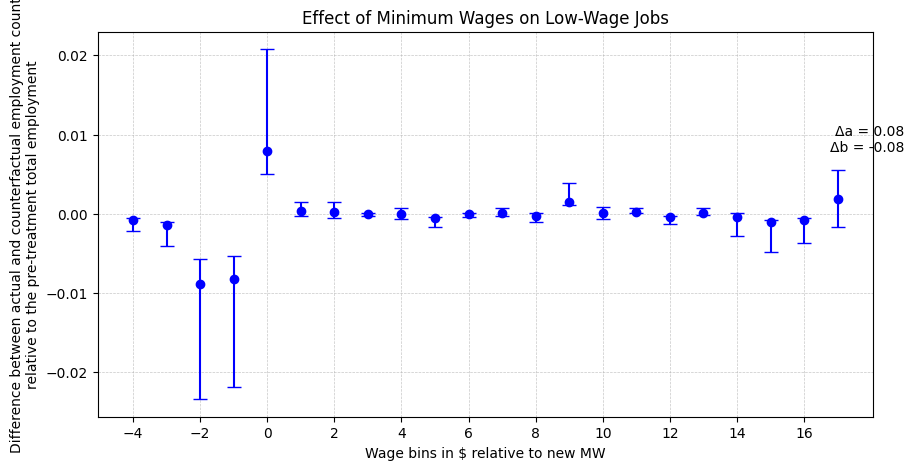

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    -4: [-0.000805, -0.001344, -0.000265],
    -3: [-0.001482, -0.002569, -0.000396],
    -2: [-0.008885, -0.014571, -0.003199],
    -1: [-0.008267, -0.013665, -0.002868],
     0: [ 0.007865,  0.002817,  0.012914],
     1: [ 0.000295, -0.000586,  0.001177],
     2: [ 0.000214, -0.000795,  0.001223],
     3: [-0.000057, -0.000249,  0.000135],
     4: [ 0.000012, -0.000662,  0.000687],
     5: [-0.000517, -0.001132,  0.000098],
     6: [-0.000091, -0.000353,  0.000172],
     7: [ 0.000123, -0.000366,  0.000611],
     8: [-0.000243, -0.000782,  0.000296],
     9: [ 0.001438,  0.000398,  0.002478],
    10: [ 0.000020, -0.000722,  0.000761],
    11: [ 0.000190, -0.000160,  0.000539],
    12: [-0.000388, -0.000883,  0.000106],
    13: [ 0.000120, -0.000323,  0.000562],
    14: [-0.000459, -0.002358,  0.000524],
    15: [-0.000995, -0.003831, -0.000150],
    16: [-0.000772, -0.002917, -0.000172],
    17: [ 0.001811,  0.003524,  0.003722]
}

# Extracting data
k_values = list(data.keys())
estimates = [entry[0] for entry in data.values()]
ci_lower = [entry[1] for entry in data.values()]
ci_upper = [entry[2] for entry in data.values()]

# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(k_values, estimates, yerr=[np.abs(ci_lower), np.abs(ci_upper)],
             fmt='o', capsize=5, color='blue', label='Confidence Interval')

plt.xlabel("Wage bins in $ relative to new MW")
plt.ylabel("Difference between actual and counterfactual employment count\nrelative to the pre-treatment total employment")
plt.title("Effect of Minimum Wages on Low-Wage Jobs")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(np.arange(min(k_values), max(k_values)+1, 2))

# Improved positioning and content of annotations
delta_a = 0.08
delta_b = -0.08
rightmost_x = max(k_values) + 2  # Adjust x to be further outside the rightmost point
top_y = max(estimates) + 0.002  # Adjust y to be higher than the highest estimate

plt.text(rightmost_x, top_y, f'Δa = {delta_a}', fontsize=10, ha='right')
plt.text(rightmost_x, top_y - 0.002, f'Δb = {delta_b}', fontsize=10, ha='right')  # Slightly below Δa, avoiding overlap

plt.show()
